In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from subprocess import check_output
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.cross_validation import  train_test_split
import time #helper libraries
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy import newaxis

Using TensorFlow backend.
/Users/giorgoschantzialexiou/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
amazon_csv = '/Users/giorgoschantzialexiou/Repositories/stock_prediction_web_app/data/historical_stock_price_data/hist_AMZN.csv'

prices_dataset =  pd.read_csv(amazon_csv, header=0)
prices_dataset.head()

,stock_name,date,open,high,low,close,volume
0,AMZN,2016-09-16,773,780,772,779,5499182
1,AMZN,2016-09-19,780,782,771,775,2297221
2,AMZN,2016-09-20,776,781,776,780,1937164
3,AMZN,2016-09-21,783,791,779,790,2718644
4,AMZN,2016-09-22,794,806,794,805,4078910


In [12]:
amazon = prices_dataset[prices_dataset['stock_name']=='AMZN']
amazon_stock_prices = amazon.close.values.astype('float32')
amazon_stock_prices = amazon_stock_prices.reshape(amazon_stock_prices.shape[0], 1)
amazon_stock_prices.shape

(365, 1)

In [11]:
amazon_stock_prices.shape[0]


365

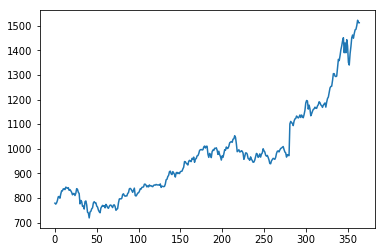

In [13]:
plt.plot(amazon_stock_prices)
plt.show()

scaler = MinMaxScaler(feature_range=(0, 1))
amazon_stock_prices = scaler.fit_transform(amazon_stock_prices)

In [16]:
train_size = int(len(amazon_stock_prices) * 0.80)
test_size = len(amazon_stock_prices) - train_size
train, test = amazon_stock_prices[0:train_size,:], amazon_stock_prices[train_size:len(amazon_stock_prices),:]
print(len(train), len(test))

(292, 73)


In [20]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [21]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [22]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [23]:
#Step 2 Build Model
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print ('compilation time : ', time.time() - start)

/Users/giorgoschantzialexiou/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
/Users/giorgoschantzialexiou/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(units=50, return_sequences=True, input_shape=(None, 1))`


('compilation time : ', 0.05005693435668945)


/Users/giorgoschantzialexiou/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`


In [24]:
model.fit(
    trainX,
    trainY,
    batch_size=128,
    nb_epoch=10,
    validation_split=0.05)

/Users/giorgoschantzialexiou/anaconda/lib/python2.7/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 275 samples, validate on 15 samples
Epoch 1/10
275/275 [==============================] - 3s 10ms/step - loss: 0.0536 - val_loss: 0.1565
Epoch 2/10
275/275 [==============================] - 0s 156us/step - loss: 0.0398 - val_loss: 0.1295
Epoch 3/10
275/275 [==============================] - 0s 161us/step - loss: 0.0295 - val_loss: 0.1073
Epoch 4/10
275/275 [==============================] - 0s 164us/step - loss: 0.0222 - val_loss: 0.0885
Epoch 5/10
275/275 [==============================] - 0s 165us/step - loss: 0.0169 - val_loss: 0.0693
Epoch 6/10
275/275 [==============================] - 0s 169us/step - loss: 0.0124 - val_loss: 0.0559
Epoch 7/10
275/275 [==============================] - 0s 176us/step - loss: 0.0100 - val_loss: 0.0459
Epoch 8/10
275/275 [==============================] - 0s 165us/step - loss: 0.0085 - val_loss: 0.0383
Epoch 9/10
275/275 [==============================] - 0s 167us/step - loss: 0.0081 - val_loss: 0.0343
Epoch 10/10
275/275 [=================

In [25]:
def plot_results_multiple(predicted_data, true_data,length):
    plt.plot(scaler.inverse_transform(true_data.reshape(-1, 1))[length:])
    plt.plot(scaler.inverse_transform(np.array(predicted_data).reshape(-1, 1))[length:])
    plt.show()

[[ 0.28391418]]
[[ 0.52811033]]
[[ 0.80051506]]
[[ 1.12716818]]
[[ 1.52943158]]
[[  946.98303223]
 [ 1143.07263184]
 [ 1361.81359863]
 [ 1624.1159668 ]
 [ 1947.13354492]]


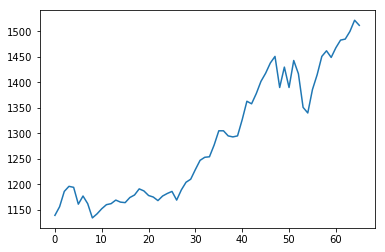

In [26]:
#predict lenght consecutive values from a real one
def predict_sequences_multiple(model, firstValue,length):
    prediction_seqs = []
    curr_frame = firstValue
    
    for i in range(length): 
        predicted = []        
        
        print(model.predict(curr_frame[newaxis,:,:]))
        predicted.append(model.predict(curr_frame[newaxis,:,:])[0,0])
        
        curr_frame = curr_frame[0:]
        curr_frame = np.insert(curr_frame[0:], i+1, predicted[-1], axis=0)
        
        prediction_seqs.append(predicted[-1])
        
    return prediction_seqs

predict_length=5
predictions = predict_sequences_multiple(model, testX[0], predict_length)
print(scaler.inverse_transform(np.array(predictions).reshape(-1, 1)))
plot_results_multiple(predictions, testY, predict_length)